# **Unsupervised Learning Predict Team CBB2**

**© Explore Data Science Academy**

CBB2 Team Members
1. Amantle Mmonkwa

2. Dineo Makrwala

3. Asenathi  Sonti

4. Desree Maleka

5. Ayanda George

6. Dumisani Jack

## Honour Code

We CBB2, confirm - by submitting this document - that the solutions in this notebook are a result of my our work and that we abide by the EDSA honour code.

Non-compliance with the honour code constitutes a material breach of contract.

 ## Predict Overview: EDSA Movie Recommendation

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.

## **TABLE OF CONTENT**

1. Importing Packages
2. Loading Data
3. Exploratory Data Analysis(EDA)
4. Data Engineering
5. Modelling 

# <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. First we need to load the libraries we are going to use throughout our notebook. After which we will load our train and test data under loading data.|

---

In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scipy as sp # <-- The sister of Numpy, used in our code for numerical efficientcy. 
import matplotlib.pyplot as plt
import seaborn as sns

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists

# Imported for our sanity
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
from pandas import MultiIndex

from plotly import graph_objects as go
# set plot style
import seaborn as sns
sns.set()

# <a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we load the data from the `train csv` file into a DataFrame for Train Data and `test_with_no_labels` file into a DataFrame for Test Data. We will be using Pandas python package to read the csv file from our local computer. We will assign our Train data to name Train and Test Data to Test. |

---

In [ ]:
#Load the tweet dataset into a dataframe


train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
moviesfile = pd.read_csv("movies.csv")
tags = pd.read_csv("tags.csv")
imdb = pd.read_csv("imdb_data.csv")
genome_tags = pd.read_csv("genome_tags.csv")
genome_scores = pd.read_csv("genome_scores.csv")

# <a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

⚡ Description: Exploratory data analysis ⚡ |
:--------------------------- |
In this section, we are required to perform an in-depth analysis of all the variables in the DataFrame. |
we first begin with the vital component which is the EDA, to better understand the dataset we are working with and to gain insight about the features and labels by performing Univariate or Multivariate , Non-graphical or Graphical Analysis"




In [ ]:
# Loading and displaying an overview of the data
print('Dimension of train is: ', train.shape)
print('Dimension of test is: ', test.shape)

Dimension of train is:  (8667757, 4)
Dimension of test is:  (1358118, 2)


In [ ]:
print (f'Number of ratings in dataset: {train.shape[0]}')

Number of ratings in dataset: 8667757


# Let's take a look at our data

In [ ]:
#The first ten rows of the trainig dataset
train.head(10)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1.518350e+09
1,106343,5,4.5,1.206239e+09
2,146790,5459,5.0,1.076216e+09
3,106362,32296,2.0,1.423043e+09
4,9041,366,3.0,8.333758e+08
5,120949,81768,3.0,1.289595e+09
6,19630,62049,4.0,1.246730e+09
7,21066,2282,1.0,9.457859e+08
8,117563,120474,4.0,1.515108e+09
9,144018,1997,5.0,1.109968e+09


After taking a look at the frist ten rows of the dataframe we can see that we have Four (4) columns in the dataFrame The test dataFrame contains only the features.

We have two features and one label features inludes:

- userId
- movieId
- timestamp

label:

- rating

Now let's take a look at the data types in the dataframe using pd.info() to get more information about the dataframe

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8667757 entries, 0 to 8667756
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  float64
dtypes: float64(2), int64(2)
memory usage: 264.5 MB


In [ ]:
train.describe()

,userId,movieId,rating,timestamp
count,8.667757e+06,8.667757e+06,8.667756e+06,8.667756e+06
mean,8.119502e+04,2.138512e+04,3.533261e+00,1.215717e+09
std,4.679992e+04,3.918728e+04,1.061166e+00,2.268908e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.049700e+04,1.197000e+03,3.000000e+00,1.011752e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.199063e+09
75%,1.215790e+05,8.623000e+03,4.000000e+00,1.447255e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [ ]:
moviesfile.describe()

,movieId
count,62423.000000
mean,122220.387646
std,63264.744844
min,1.000000
25%,82146.500000
50%,138022.000000
75%,173222.000000
max,209171.000000


In [ ]:
tags.describe()

,userId,movieId,timestamp
count,125490.000000,125490.000000,1.254890e+05
mean,5757.981815,32441.279568,1.487643e+09
std,1551.599921,42127.594636,9.863140e+07
min,3.000000,1.000000,1.137128e+09
25%,6038.000000,3033.000000,1.526869e+09
50%,6550.000000,7292.000000,1.527452e+09
75%,6550.000000,55116.000000,1.528564e+09
max,6550.000000,206727.000000,1.574253e+09


In [ ]:
#checking null values in the training data
train.isnull().sum()

userId       0
movieId      0
rating       1
timestamp    1
dtype: int64

Our training data shows that we have 0 null values which means we don't have any missing values.

In [ ]:
moviesfile.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [ ]:
tags.isnull().sum()

userId       0
movieId      0
tag          1
timestamp    1
dtype: int64

In [ ]:
tags.dropna()

,userId,movieId,tag,timestamp
0,3,260,classic,1.439472e+09
1,3,260,sci-fi,1.439472e+09
2,4,1732,dark comedy,1.573944e+09
3,4,1732,great dialogue,1.573944e+09
4,4,7569,so bad it's good,1.573943e+09
...,...,...,...,...
125484,6550,80292,biography,1.527042e+09
125485,6550,80292,nightclub entertainer,1.527042e+09
125486,6550,80295,haunting,1.527220e+09
125487,6550,80295,occult,1.527220e+09


In [ ]:
# look at data statistics
train.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [ ]:
#Checking for unique values sentiment
train['rating'].value_counts()

4.0    2300148
3.0    1698743
5.0    1252108
3.5    1101335
4.5     763145
2.0     569437
2.5     437765
1.0     269919
1.5     138477
0.5     136679
Name: rating, dtype: int64

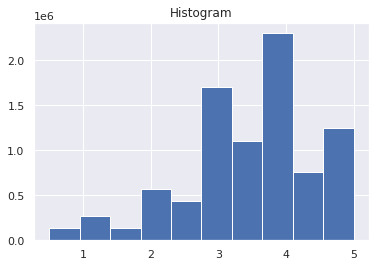

In [ ]:
 # hostogram of total_bills
plt.hist(train['rating'])
  
plt.title("Histogram")
  
# Adding the legends
plt.show()

In [ ]:
table = pd.merge(train,moviesfile, on = 'movieId', how = 'outer')

Average rating in dataset: 3.533261261622962


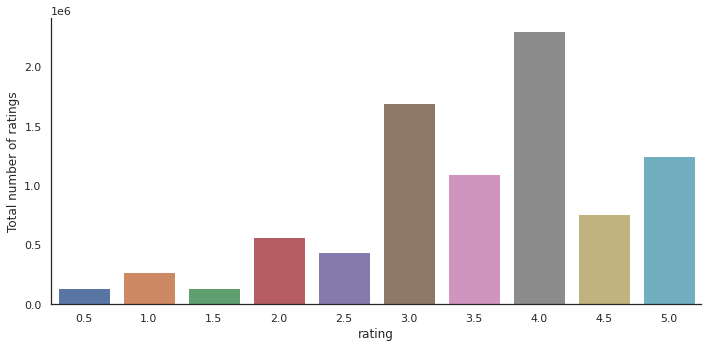

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=table, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")
print (f'Average rating in dataset: {np.mean(table["rating"])}')

# <a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
|⚡ Description: Data engineering ⚡ |
|:--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase our datasets contains a non_numerical column certain preprocessing steps must be carried out, which involves:


#### Data processing




In [ ]:
# Loading and displaying an overview of the data
print('Dimension of train is: ', train.shape)
print('Dimension of test is: ', test.shape)

Dimension of train is:  (8667757, 4)
Dimension of test is:  (1358118, 2)


1. There are 4 columns and 10000038 rows for the Train Data.
2. There are 2 columns and 5000019 for the Test Data.

A look at the first ten rows of our data

In [ ]:
train.head(5)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1.518350e+09
1,106343,5,4.5,1.206239e+09
2,146790,5459,5.0,1.076216e+09
3,106362,32296,2.0,1.423043e+09
4,9041,366,3.0,8.333758e+08


In [ ]:
moviesfile.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
tags.head(5)

,userId,movieId,tag,timestamp
0,3,260,classic,1.439472e+09
1,3,260,sci-fi,1.439472e+09
2,4,1732,dark comedy,1.573944e+09
3,4,1732,great dialogue,1.573944e+09
4,4,7569,so bad it's good,1.573943e+09


In [ ]:
table.head(5)

,userId,movieId,rating,timestamp,title,genres
0,5163.0,57669,4.0,1.518350e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388.0,57669,3.5,1.237455e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050.0,57669,4.0,1.425632e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490.0,57669,4.5,1.408229e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616.0,57669,4.5,1.446942e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [ ]:
print (f'Number of ratings in dataset: {table.shape[0]}')

Number of ratings in dataset: 8683771


# <a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
|⚡ Description: Modelling on the movie recommendations system ⚡ |
|:--------------------------- |



#### Train - Test - Split

Before anything we have to split our train data into features and target variables. Split our train data into a train and validation set. This will allow us to evaluate our model performance and chose the best model to use for our submission

---

In [ ]:
train.head(5)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1.518350e+09
1,106343,5,4.5,1.206239e+09
2,146790,5459,5.0,1.076216e+09
3,106362,32296,2.0,1.423043e+09
4,9041,366,3.0,8.333758e+08


In [ ]:
moviesfile.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
tags.head(5)

,userId,movieId,tag,timestamp
0,3,260,classic,1.439472e+09
1,3,260,sci-fi,1.439472e+09
2,4,1732,dark comedy,1.573944e+09
3,4,1732,great dialogue,1.573944e+09
4,4,7569,so bad it's good,1.573943e+09


In [ ]:
table.head(5)

,userId,movieId,rating,timestamp,title,genres
0,5163.0,57669,4.0,1.518350e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388.0,57669,3.5,1.237455e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050.0,57669,4.0,1.425632e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490.0,57669,4.5,1.408229e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616.0,57669,4.5,1.446942e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [ ]:
#

In [ ]:
table['auth_tags'] = (pd.Series(table[[ 'genres']]
                      .fillna('')
                      .values.tolist()).str.join(' '))

In [ ]:
# Convienient indexes to map between our movie titles and indexes of 
# the movies dataframe
titles = table['title']
indices = pd.Series(table.index, index=table['title'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
table.head(5)

,userId,movieId,rating,timestamp,title,genres,auth_tags
0,5163.0,57669,4.0,1.518350e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller,Comedy|Crime|Drama|Thriller
1,87388.0,57669,3.5,1.237455e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller,Comedy|Crime|Drama|Thriller
2,137050.0,57669,4.0,1.425632e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller,Comedy|Crime|Drama|Thriller
3,120490.0,57669,4.5,1.408229e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller,Comedy|Crime|Drama|Thriller
4,50616.0,57669,4.5,1.446942e+09,In Bruges (2008),Comedy|Crime|Drama|Thriller,Comedy|Crime|Drama|Thriller


In [ ]:
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances

In [ ]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0, stop_words='english')

# Produce a feature matrix, where each row corresponds to a movie,
# with TF-IDF features as columns 
tf_authTags_matrix = tf.fit_transform(table['auth_tags'])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances

cosine_sim_authTags = cosine_similarity(tf_authTags_matrix,
                                        tf_authTags_matrix)


In [ ]:
cosine_sim_authTags = cosine_similarity(tf_authTags_matrix,
                                        tf_authTags_matrix)

In [ ]:
cosine_sim_authTags[:5]

### Recommendations

In [ ]:
def content_generate_rating_estimate(movie_title, user, rating_data, k=20, threshold=0.0):
    # Convert the book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[movie_title]
    neighbors = [] # <-- Stores our collection of similarity values 

    # Gather the similarity ratings between each movie the user has rated
    # and the reference book 
    for index, row in rating_data[rating_data['userId']==user].iterrows():
        sim = cosine_sim_authTags[b_idx-1, indices[row['title']]-1]
        neighbors.append((sim, row['rating']))
    # Select the top-N values from our collection
    k_neighbors = heapq.nlargest(k, neighbors, key=lambda t: t[0])

    # Compute the weighted average using similarity scores and 
    # user item ratings. 
    simTotal, weightedSum = 0, 0
    for (simScore, rating) in k_neighbors:
        # Ensure that similarity ratings are above a given threshold
        if (simScore > threshold):
            simTotal += simScore
            weightedSum += simScore * rating
    try:
        predictedRating = weightedSum / simTotal
    except ZeroDivisionError:
        # Cold-start problem - No ratings given by user. 
        # We use the average rating for the reference item as a proxy in this case 
        predictedRating = np.mean(rating_data[rating_data['title']==movie_title]['rating'])
    return predictedRating

In [ ]:
# Subset of ratings from user 314
table_ratings[table_ratings['userId'] == 314][3:10]

In [ ]:
title = "Three Musketeers, The (1993)"
actual_rating = table[(table['userId'] == 314) & (table['title'] == title)]['rating'].values[0]
pred_rating = content_generate_rating_estimate(movie_title=title, user=314, rating_data=table)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")